Epoch 0, Loss: 0.4836
Epoch 30, Loss: 0.0058
Epoch 60, Loss: 0.0028
Epoch 90, Loss: 0.0013
Epoch 120, Loss: 0.0003
Epoch 150, Loss: 0.0001
Epoch 180, Loss: 0.0001
Epoch 210, Loss: 0.0000
Epoch 240, Loss: 0.0000
Epoch 270, Loss: 0.0000


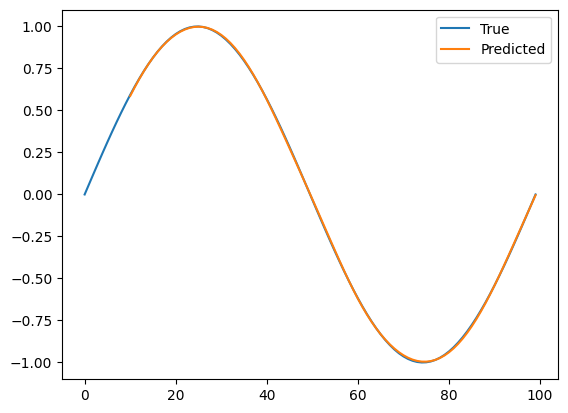

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# 데이터 생성 (sin 함수 기반)
def create_data(seq_length=50):
    x = np.linspace(0, 2 * np.pi, seq_length)
    data = np.sin(x)
    return data

# 시퀀스 생성
def create_sequences(data, input_size):
    xs, ys = [], []
    for i in range(len(data) - input_size):
        x = data[i:i+input_size] # 현재 예측할 정답 제외
        y = data[i+input_size]   # 타겟 변수
        xs.append(x)
        ys.append(y)
    return torch.tensor(xs).float().unsqueeze(-1), torch.tensor(ys).float()
    # rnn 입력 차원이 3D이므로 마지막차원에 input_size =1 이라서 1 추가

seq = create_data(100)
input_size = 10
X, y = create_sequences(seq, input_size)

# RNN 직접 구현
class RNN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(RNN, self).__init__()
        self.hidden_dim = hidden_dim

        # RNN cell 내부 weight
        self.Wxh = nn.Parameter(torch.randn(input_dim, hidden_dim) * 0.1)  # input → hidden
        self.Whh = nn.Parameter(torch.randn(hidden_dim, hidden_dim) * 0.1) # 이전 hidden → 현재 hidden
        self.bh = nn.Parameter(torch.zeros(hidden_dim))                    # hidden bias

        self.Who = nn.Parameter(torch.randn(hidden_dim, output_dim) * 0.1) # hidden → output
        self.bo = nn.Parameter(torch.zeros(output_dim))                    # output bias

    def forward(self, x):
        h = torch.zeros(x.size(0), self.hidden_dim)  # 초기 hidden state 0으로 초기화
        for t in range(x.size(1)):  # 시퀀스 길이만큼 반복
            x_t = x[:, t, :]       # 현재 시점의 입력
            h = torch.tanh(x_t @ self.Wxh + h @ self.Whh + self.bh)  # 기존 h와 현재 입력을 가중치 행렬 곱 + 편향 한 뒤 tanh
        y = h @ self.Who + self.bo
        return y

# 모델 생성
model = RNN(input_dim=1, hidden_dim=16, output_dim=1)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# 학습 루프
for epoch in range(300):
    output = model(X)
    loss = criterion(output.squeeze(), y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 30 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

# 결과 시각화
predicted = model(X).detach().numpy()
plt.plot(range(len(seq)), seq, label='True')
plt.plot(range(input_size, len(seq)), predicted, label='Predicted')
plt.legend()
plt.show()






[['부산', '행', '때문', '너무', '기대하고', '봤'], ['한국', '좀비', '영화', '어색하지', '않게', '만들어졌', '놀랍']]
132307
33077


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 40, 64)         │       640,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 64)             │        24,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 665,026 (2.54 MB)

 Trainable params: 665,026 (2.54 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
931/931 ━━━━━━━━━━━━━━━━━━━━ 87s 88ms/step - accuracy: 0.8102 - loss: 0.4171 - val_accuracy: 0.8890 - val_loss: 0.2697
Epoch 2/5
931/931 ━━━━━━━━━━━━━━━━━━━━ 136s 82ms/step - accuracy: 0.9019 - loss: 0.2453 - val_accuracy: 0.8960 - val_loss: 0.2558
Epoch 3/5
931/931 ━━━━━━━━━━━━━━━━━━━━ 92s 93ms/step - accuracy: 0.9104 - loss: 0.2250 - val_accuracy: 0.8989 - val_loss: 0.2502
Epoch 4/5
931/931 ━━━━━━━━━━━━━━━━━━━━ 80s 86ms/step - accuracy: 0.9148 - loss: 0.2151 - val_accuracy: 0.8981 - val_loss: 0.2506
Epoch 5/5
931/931 ━━━━━━━━━━━━━━━━━━━━ 86s 90ms/step - accuracy: 0.9194 - loss: 0.2053 - val_accuracy: 0.9011 - val_loss: 0.2507


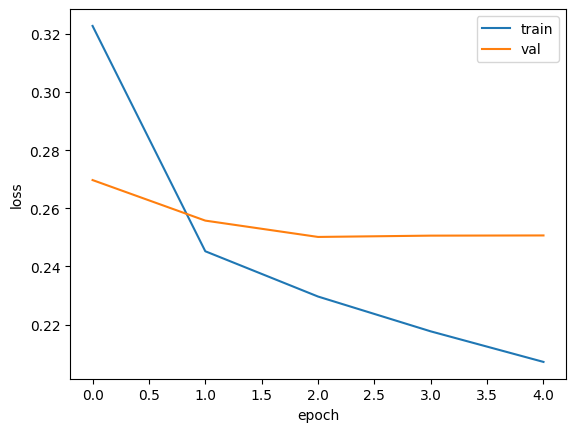

1034/1034 ━━━━━━━━━━━━━━━━━━━━ 14s 13ms/step - accuracy: 0.8970 - loss: 0.2528
Loss: 0.24658070504665375
Accuracy: 0.9000211358070374


In [1]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt

# 영화리뷰 데이터를 바탕으로 긍정 부정 구분하는 모델

with open("/content/drive/MyDrive/dataset/Korean_movie_reviews_2016.txt", encoding='utf-8') as f:
    docs = [doc.strip().split('\t') for doc in f]
    # 파일의 각 줄을 읽어와 양쪽 공백 제거하고 tab 기준으로 분리해서 리스트 저장
    docs = [(doc[0], int(doc[1])) for doc in docs if len(doc) == 2]
    # 리뷰 텍스트와, 레이블 있는 경우(==2)에만 정수형으로 변환해서 튜플 형태 저장
    texts, labels = zip(*docs)
    #모든 텍스트를 texts에, 모든 레이블을 labels에 저장

words_list = [doc.strip().split() for doc in texts]
# 각 리뷰 텍스트를 공백을 기준으로 단어 단위로 분리하여 리스트로 만들고 이를 모아서 다시 리스트 만듬
print(words_list[:2])

# Dataset Preprocessing
total_words = []
#모든 단어를 저장할 빈 리스트 초기화
for words in words_list:
    total_words.extend(words)
#각 리뷰의 단어 리스트를 total_words리스트에 추가

from collections import Counter
c = Counter(total_words)
# Counter이용하여 전체 단어들의 빈도 계산해서 c에 저장

max_features = 10000
common_words = [ word for word, count in c.most_common(max_features)]
# 빈도를 기준으로 상위 10000(max_features)개의 단어들만 선택

# 각 단어에 대해서 index 생성하기
words_dic ={}
for index, word in enumerate(common_words):
    words_dic[word]=index+1

# 각 문서를 상위 10000개 단어들에 대해서 index 번호로 표현하기
filtered_indexed_words = []

#인덱스 번호로 변환된 리뷰를 저장할 빈 리스트
for review in words_list: #리스트 순회하면서
    indexed_words=[] #현재 리뷰의 인덱스화된 단어를 저장할 임시 리스트  초기화
    for word in review:
        try:
            indexed_words.append(words_dic[word])
            # 단어가 word_dic에 있는 경우 해당 단어를 indexed_words에 추가
        except:
            pass
    filtered_indexed_words.append(indexed_words)
    #indexed_words에 추가된 단어를 filtered_indexed_words에 추가

# Dataset Loader for Model
# X input padding (고정된 길이의 입력 시퀀스 제공위해)
max_len = 40 # 모든 시퀀스의 최대 길이를 40으로 설정
X = sequence.pad_sequences(filtered_indexed_words, maxlen=max_len)


# y to one-hot category labeling
y_one_hot = to_categorical(labels)

# 데이터셋 분할
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.2)

print(len(X_train))
print(len(X_test))

# 모델링


model = models.Sequential()
model.add(layers.Embedding((max_features+1), 64, input_shape = (max_len,), mask_zero = True))
model.add(layers.Bidirectional(layers.LSTM(32)))
model.add(layers.Dense(2, activation='softmax'))
model.summary()

# early stopping 적용
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)


# optimizer에 필요한 옵션 적용
# loss와 평가 metric 적용
model.compile(optimizer=RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# 모델 훈련
history = model.fit(X_train, y_train, epochs=5, batch_size=128, validation_split=0.1, callbacks=[es])

# Training history plot 시각화


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

# model test
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Loss:", test_loss)
print("Accuracy:", test_acc)

In [4]:
import numpy as np
def predict_sentiment(sentence: str, model, words_dic: dict, max_len: int, class_names: list = ['부정', '긍정']):
    """
    주어진 문장의 감성을 예측합니다.

    Args:
        sentence (str): 감성을 예측할 입력 문장.
        model: 훈련된 Keras 모델 객체.
        words_dic (dict): 단어를 인덱스로 매핑하는 딕셔너리 (훈련 시 사용된 것).
        max_len (int): 입력 시퀀스의 최대 길이 (훈련 시 사용된 것).
        class_names (list): 클래스 인덱스에 해당하는 이름 리스트 (기본값: ['부정', '긍정']).

    Returns:
        tuple: (예측된 감성 이름, 예측 확률 배열)
    """
    # 1. 문장 전처리 (훈련 시와 동일하게)
    words = sentence.strip().split()

    indexed_words = []
    # words_dic.get(단어, 기본값): 단어가 없으면 기본값 반환
    # OOV 토큰이 words_dic에 0번으로 정의되어 있다고 가정합니다.
    oov_index = words_dic.get('<OOV>', 0) # <OOV>가 없으면 기본값 0 사용
    for word in words:
        indexed_words.append(words_dic.get(word, oov_index))

    # 패딩 적용: 모델이 기대하는 max_len과 padding='post'를 맞춰야 합니다.
    # 단일 샘플이므로 [indexed_words] 형태로 전달합니다.
    padded_sequence = sequence.pad_sequences([indexed_words], maxlen=max_len, padding='post')

    # 2. 모델 예측
    # 모델은 배치 형태의 입력을 기대하므로, np.expand_dims로 배치 차원을 추가합니다.
    predicted_probabilities = model.predict(np.expand_dims(padded_sequence[0], axis=0))
    predicted_class_index = np.argmax(predicted_probabilities)

    # 3. 결과 해석
    predicted_sentiment = class_names[predicted_class_index]

    return predicted_sentiment, predicted_probabilities[0]

# --- 함수 사용 예시 ---
# (이전에 model, words_dic, max_len이 정의되었다고 가정합니다)

# 예시 1: 긍정적인 문장
sentence1 = "이 영화 정말 최고예요! 다시 보고 싶어요."
sentiment1, probs1 = predict_sentiment(sentence1, model, words_dic, max_len)
print(f"문장: '{sentence1}'")
print(f"예측 감성: {sentiment1}")
print(f"예측 확률 (부정/긍정): {probs1}\n")

# 예시 2: 부정적인 문장
sentence2 = "기대 이하였어요. 돈 아까운 영화네요."
sentiment2, probs2 = predict_sentiment(sentence2, model, words_dic, max_len)
print(f"문장: '{sentence2}'")
print(f"예측 감성: {sentiment2}")
print(f"예측 확률 (부정/긍정): {probs2}\n")

# 예시 3: 중립적이거나 불확실한 문장
sentence3 = "음... 그냥 그랬던 것 같아요. 특별한 감흥은 없었어요."
sentiment3, probs3 = predict_sentiment(sentence3, model, words_dic, max_len)
print(f"문장: '{sentence3}'")
print(f"예측 감성: {sentiment3}")
print(f"예측 확률 (부정/긍정): {probs3}\n")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step
문장: '이 영화 정말 최고예요! 다시 보고 싶어요.'
예측 감성: 긍정
예측 확률 (부정/긍정): [0.13903856 0.86096144]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
문장: '기대 이하였어요. 돈 아까운 영화네요.'
예측 감성: 부정
예측 확률 (부정/긍정): [9.9901223e-01 9.8778354e-04]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
문장: '음... 그냥 그랬던 것 같아요. 특별한 감흥은 없었어요.'
예측 감성: 부정
예측 확률 (부정/긍정): [0.82282984 0.17717013]

